In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, rc={'figure.figsize':(11,8)}, font_scale=2)
import sklearn as sk

In [39]:
df = pd.read_csv("https://gitlab.com/mirsakhawathossain/pha-ml/-/raw/master/Dataset/dataset.csv")
df["pha"] = df["pha"] == "Y"
df["neo"] = df["neo"] == "Y"

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958524 non-null  bool   
 7   pha             958524 non-null  bool   
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

SPK-ID: Object primary SPK-ID  
Object ID: Object internal database ID  
Object fullname: Object full name/designation  
pdes: Object primary designation  
name: Object IAU name  
NEO: Near-Earth Object (NEO) flag  
PHA: Potentially Hazardous Asteroid (PHA) flag  
H: Absolute magnitude parameter  
Diameter: object diameter (from equivalent sphere) km Unit  
Albedo: Geometric albedo  
Diameter_sigma: 1-sigma uncertainty in object diameter km Unit  
Orbit_id: Orbit solution ID  
Epoch: Epoch of osculation in modified Julian day form  
Equinox: Equinox of reference frame  
e: Eccentricity  
a: Semi-major axis au Unit  
q: perihelion distance au Unit  
i: inclination; angle with respect to x-y ecliptic plane  
tp: Time of perihelion passage TDB Unit  
moid_ld: Earth Minimum Orbit Intersection Distance au Unit  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='diameter', ylabel='H'>

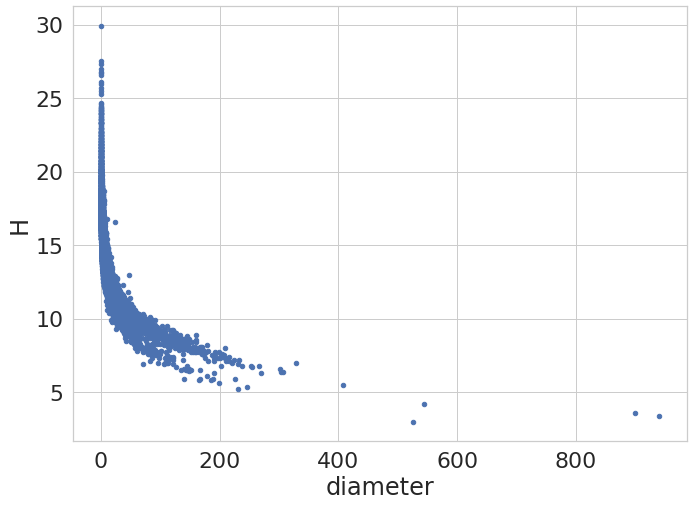

In [41]:
df.plot.scatter("diameter", "H")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='diameter', ylabel='H'>

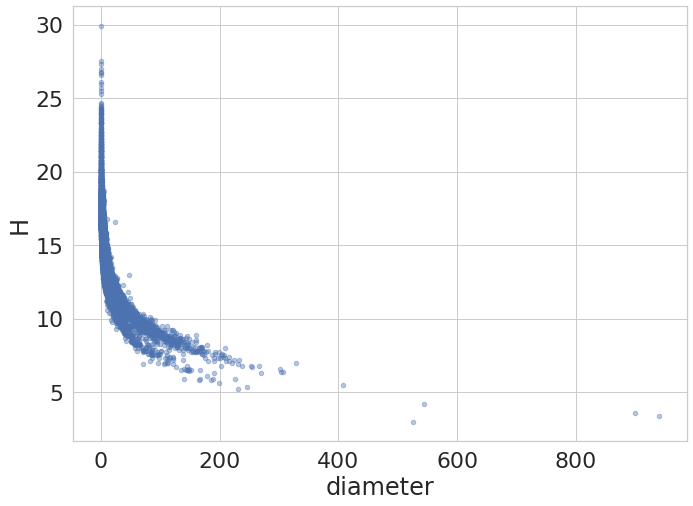

In [42]:
df.plot.scatter("diameter", "H",alpha=.4)

<AxesSubplot:xlabel='diameter', ylabel='albedo'>

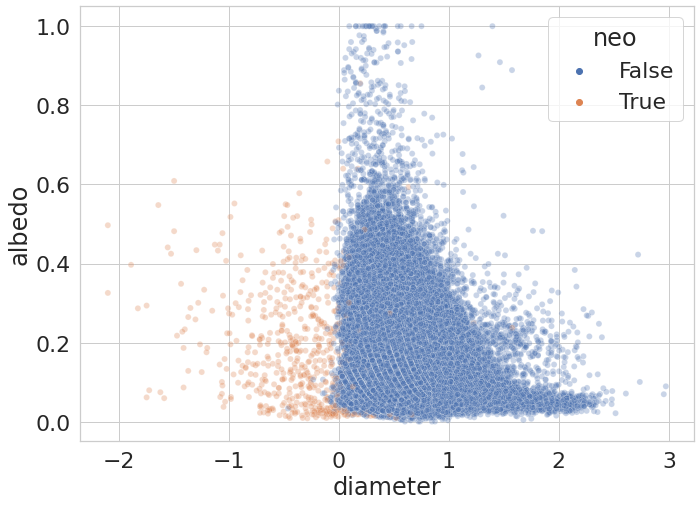

In [43]:
sns.scatterplot(np.log10(df["diameter"]), df["albedo"], hue=df["neo"], alpha=.3)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958524 non-null  bool   
 7   pha             958524 non-null  bool   
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

# Data Cleaning

In [55]:
cleaned_data = df.drop(columns=["id", "spkid", "full_name", "pdes", "name", "prefix", "diameter", "albedo", "diameter_sigma",
                                "orbit_id", "equinox", 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om',
                                'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per'])
cleaned_data

,neo,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,...,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,class,rms
0,False,False,3.400,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,...,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.594780,620.640533,MBA,0.43301
1,False,False,4.200,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,...,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.234290,480.348639,MBA,0.35936
2,False,False,5.330,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,...,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.034290,402.514639,MBA,0.33848
3,False,False,3.000,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,...,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.139480,443.451432,MBA,0.39980
4,False,False,6.900,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,...,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.095750,426.433028,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,False,False,17.135,2437203.5,37203,19600926.0,0.185919,2.280861,1.856807,5.984416,...,2.704916,0.286125,2.437266e+06,1.960113e+07,1258.191614,3.444741,0.861979,335.456367,MBA,0.23839
958520,False,False,18.500,2459000.5,59000,20200531.0,0.282920,2.334910,1.674319,8.082280,...,2.995502,0.276248,2.459362e+06,2.021053e+07,1303.177916,3.567907,0.671242,261.227249,MBA,0.53633
958521,True,True,20.400,2459000.5,59000,20200531.0,0.662446,2.817152,0.950941,4.679278,...,4.683363,0.208444,2.459574e+06,2.021123e+07,1727.085364,4.728502,0.035589,13.850093,APO,0.51556
958522,False,False,18.071,2441956.5,41956,19731001.0,0.202053,2.373137,1.893638,0.732484,...,2.852636,0.269600,2.441974e+06,1.973102e+07,1335.311579,3.655884,0.893896,347.877506,MBA,0.25641


<AxesSubplot:xlabel='index'>

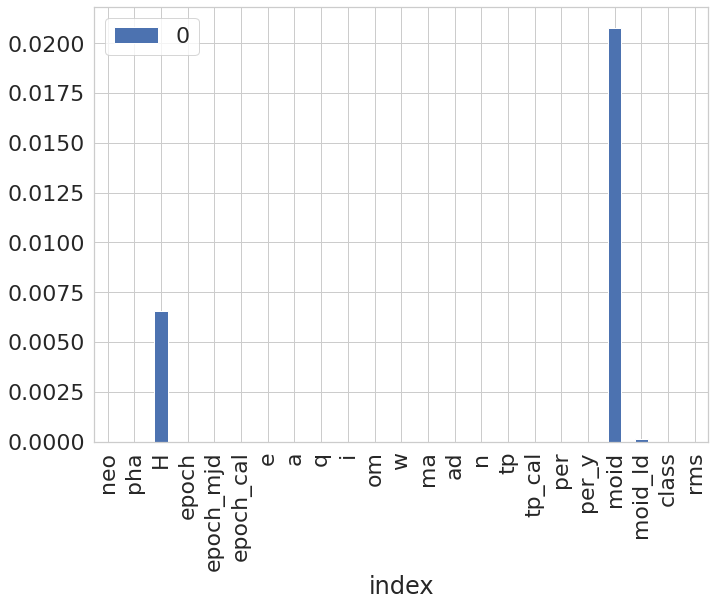

In [56]:
pd.DataFrame(cleaned_data.isna().sum()/len(cleaned_data)).reset_index().plot.bar("index", 0)

Only .65% of the rows had null values for H.

# removing null values

In [57]:
cleaned_data = cleaned_data[cleaned_data['H'].notna()]
cleaned_data = cleaned_data[cleaned_data['moid'].notna()]
cleaned_data = cleaned_data[cleaned_data['ma'].notna()]
cleaned_data = cleaned_data[cleaned_data['ad'].notna()]
cleaned_data = cleaned_data[cleaned_data['rms'].notna()]
cleaned_data[['neo', 'pha', 'class']] = cleaned_data[['neo', 'pha', 'class']].astype('category')
cleaned_data.isna().sum()

neo          0
pha          0
H            0
epoch        0
epoch_mjd    0
epoch_cal    0
e            0
a            0
q            0
i            0
om           0
w            0
ma           0
ad           0
n            0
tp           0
tp_cal       0
per          0
per_y        0
moid         0
moid_ld      0
class        0
rms          0
dtype: int64

In [27]:
cleaned_data.corr()

,neo,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,...,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,rms
neo,1.000000,0.297159,0.522636,-0.130742,-0.130742,-0.131352,0.487333,-0.004416,-0.108405,0.083400,...,-0.008130,-0.001760,0.557484,-0.053587,-0.053744,-0.000278,-0.000278,-0.097017,-0.094415,0.002196
pha,0.297159,1.000000,0.082403,-0.011862,-0.011862,-0.011823,0.189784,-0.001324,-0.035559,0.033994,...,0.001324,-0.000436,0.170873,-0.004499,-0.004600,-0.000085,-0.000085,-0.030339,-0.029566,-0.001353
H,0.522636,0.082403,1.000000,-0.175712,-0.175712,-0.176349,0.345334,-0.032187,-0.437429,-0.099022,...,-0.033698,-0.024343,0.588960,-0.061751,-0.062157,-0.004489,-0.004488,-0.433082,-0.435188,0.005633
epoch,-0.130742,-0.011862,-0.175712,1.000000,1.000000,0.999559,-0.112944,-0.005660,-0.073192,-0.019710,...,0.010671,-0.004156,-0.050603,0.417057,0.416612,-0.000498,-0.000498,-0.075283,-0.072353,0.008951
epoch_mjd,-0.130742,-0.011862,-0.175712,1.000000,1.000000,0.999559,-0.112944,-0.005660,-0.073192,-0.019710,...,0.010671,-0.004156,-0.050603,0.417057,0.416612,-0.000498,-0.000498,-0.075283,-0.072353,0.008951
epoch_cal,-0.131352,-0.011823,-0.176349,0.999559,0.999559,1.000000,-0.114071,-0.005658,-0.072718,-0.019462,...,0.010969,-0.004332,-0.051062,0.416728,0.416326,-0.000709,-0.000709,-0.074786,-0.072100,0.008895
e,0.487333,0.189784,0.345334,-0.112944,-0.112944,-0.114071,1.000000,0.014738,-0.119608,0.130588,...,-0.025549,0.025802,0.198972,-0.056805,-0.057281,0.012111,0.012108,-0.109338,-0.107884,-0.004886
a,-0.004416,-0.001324,-0.032187,-0.005660,-0.005660,-0.005658,0.014738,1.000000,0.074237,0.025488,...,0.001683,0.999559,-0.025420,-0.007068,-0.007043,0.981577,0.888620,0.074185,0.073938,-0.000484
q,-0.108405,-0.035559,-0.437429,-0.073192,-0.073192,-0.072718,-0.119608,0.074237,1.000000,0.036520,...,-0.002292,0.053725,-0.328145,-0.088272,-0.087843,0.005505,0.005505,0.999734,0.995671,-0.005383
i,0.083400,0.033994,-0.099022,-0.019710,-0.019710,-0.019462,0.130588,0.025488,0.036520,1.000000,...,0.002739,0.038236,-0.013703,-0.010174,-0.009828,0.026287,0.026280,0.045739,0.044418,-0.003755


<AxesSubplot:>

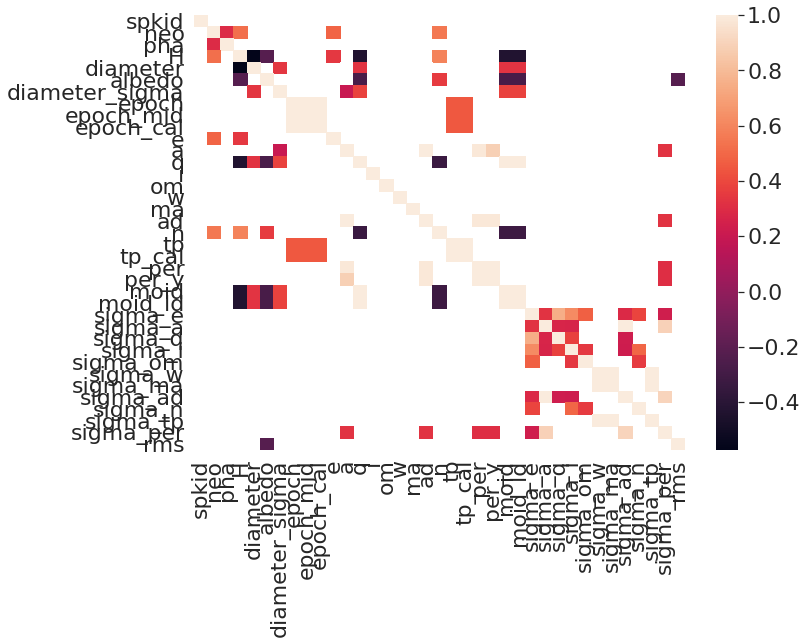

In [26]:
corr = df.corr()
corr = corr[abs(corr)>.2]
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [27]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 34 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        958524 non-null  bool   
 1   pha        958524 non-null  bool   
 2   H          952261 non-null  float64
 3   epoch      958524 non-null  float64
 4   epoch_mjd  958524 non-null  int64  
 5   epoch_cal  958524 non-null  float64
 6   e          958524 non-null  float64
 7   a          958524 non-null  float64
 8   q          958524 non-null  float64
 9   i          958524 non-null  float64
 10  om         958524 non-null  float64
 11  w          958524 non-null  float64
 12  ma         958523 non-null  float64
 13  ad         958520 non-null  float64
 14  n          958524 non-null  float64
 15  tp         958524 non-null  float64
 16  tp_cal     958524 non-null  float64
 17  per        958520 non-null  float64
 18  per_y      958523 non-null  float64
 19  moid       938603 non-n

In [58]:
dummies = pd.get_dummies(cleaned_data[['class', "neo"]])
cleaned_data.drop(columns=["class", "neo"], inplace=True)
cleaned_data

,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,...,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,rms
0,False,3.400,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,80.305531,...,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.594780,620.640533,0.43301
1,False,4.200,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,173.024741,...,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.234290,480.348639,0.35936
2,False,5.330,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,169.851482,...,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.034290,402.514639,0.33848
3,False,3.000,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,103.810804,...,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.139480,443.451432,0.39980
4,False,6.900,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,141.571026,...,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.095750,426.433028,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,False,17.135,2437203.5,37203,19600926.0,0.185919,2.280861,1.856807,5.984416,194.229902,...,342.057565,2.704916,0.286125,2.437266e+06,1.960113e+07,1258.191614,3.444741,0.861979,335.456367,0.23839
958520,False,18.500,2459000.5,59000,20200531.0,0.282920,2.334910,1.674319,8.082280,355.248239,...,260.113042,2.995502,0.276248,2.459362e+06,2.021053e+07,1303.177916,3.567907,0.671242,261.227249,0.53633
958521,True,20.400,2459000.5,59000,20200531.0,0.662446,2.817152,0.950941,4.679278,182.982832,...,240.473601,4.683363,0.208444,2.459574e+06,2.021123e+07,1727.085364,4.728502,0.035589,13.850093,0.51556
958522,False,18.071,2441956.5,41956,19731001.0,0.202053,2.373137,1.893638,0.732484,176.499082,...,355.351127,2.852636,0.269600,2.441974e+06,1.973102e+07,1335.311579,3.655884,0.893896,347.877506,0.25641


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = cleaned_data.drop(columns=["pha"])
y = cleaned_data["pha"]
X_scaler = StandardScaler()
X_scaler.fit(X)
X = X_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
from imblearn.over_sampling import SMOTE 
print("label distribution: ")
print("False: {}".format(sum(y_train == 0)))
print("True: {} \n".format(sum(y_train == 1))) 

sm = SMOTE(random_state = 12) 
X_train, y_train = sm.fit_resample(X_train, y_train.astype(int).ravel()) 

print("label distribution after oversampling procedure: ")
print("False: {}".format(sum(y_train == 0)))
print("True: {} \n".format(sum(y_train == 1))) 

label distribution: 
False: 651183
True: 1451 

label distribution after oversampling procedure: 
False: 651183
True: 651183 



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# train
lr = LogisticRegression(max_iter= 10000, n_jobs=-1)
lr.fit(X_train, y_train)

# fit
lr_pred = lr.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test.astype(int), lr_pred)

0.9946299798713626

In [80]:
pd.DataFrame(y_test).value_counts()

pha  
False    279086
True        615
dtype: int64

In [82]:
metrics.confusion_matrix(y_test.astype(int), lr_pred)

array([[277584,   1502],
       [     0,    615]])

# Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 150, max_depth=5, n_job=-1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [85]:
metrics.accuracy_score(y_test.astype(int), rf_pred)

0.9993421546580098

In [86]:
metrics.confusion_matrix(y_test.astype(int), rf_pred)

array([[278903,    183],
       [     1,    614]])

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

KeyboardInterrupt: 

In [ ]:
metrics.accuracy_score(y_test.astype(int), knn_pred)

In [ ]:
metrics.confusion_matrix(y_test.astype(int), knn_pred)

In [ ]:
df.plot.scatter("diameter", "neo")

In [ ]:
plt.scatter(df["pha"], df["diameter"])

In [ ]:
df.groupby(["neo","pha"])["pha"].count()

In [43]:
df["pha"].value_counts()

False    956458
True       2066
Name: pha, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaler.transform(df)